コメントはアップデートしていない

In [1]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

backtest_start_time = rk.datetime(2019,9,30,11,49)
backtest_end_time = rk.datetime(2019,12,29,11,49)
    
ohlcv_df_1min = rk.dataset_manager.get_ohlcv(start_time=backtest_start_time, end_time=backtest_end_time)
ohlcv_with_ta = rk.add_technical_statistics_to_ohlcv_df(ohlcv_df_1min)

id_timeframe1_bottom5_middle3_top2 = rk.get_summary_id_by_params_set(1,5,3,2)
params_df, summary_df, transaction_log_df = rk.get_params_summary_log_df_by_summary_id(id_timeframe1_bottom5_middle3_top2)

downloading BTC/USD data on bitmex
downloading 2019-12-31 16:22:30 ~ 2019-12-31 16:22:49.353702 data
No data downloaded
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Done


In [2]:
win_transaction_log = transaction_log_df[transaction_log_df.profit_status == "win"]
lose_transaction_log = transaction_log_df[transaction_log_df.profit_status == "lose"]

win_merged_close = rk.pd.merge(win_transaction_log, ohlcv_with_ta, left_on="close_time", right_on=ohlcv_with_ta.index)
lose_merged_close = rk.pd.merge(lose_transaction_log, ohlcv_with_ta, left_on="close_time", right_on=ohlcv_with_ta.index)

win_merged_open = rk.pd.merge(win_transaction_log, ohlcv_with_ta, left_on="entry_time", right_on=ohlcv_with_ta.index)
lose_merged_open = rk.pd.merge(lose_transaction_log, ohlcv_with_ta, left_on="entry_time", right_on=ohlcv_with_ta.index)

win_merged_close_vol_10 = win_merged_close.head(10)["ad"]
win_merged_open_vol_10 = win_merged_open.head(10)["ad"]
#print(rk.pd.concat([win_merged_close_vol_10, win_merged_open_vol_10], axis=1))

In [67]:
merged_transaction_log_close = rk.pd.merge(transaction_log_df, ohlcv_with_ta, left_on="close_time", right_on=ohlcv_with_ta.index)
merged_transaction_log_open = rk.pd.merge(transaction_log_df, ohlcv_with_ta, left_on="entry_time", right_on=ohlcv_with_ta.index)

In [61]:
def create_hist(win_merged, lose_merged, focus_factor=""):
    rk.plt.rcParams['figure.figsize'] = (10.0, 10.0)
    win = win_merged[focus_factor]
    lose = lose_merged[focus_factor]
    
    bins = 200
    
    figure = rk.plt.figure()
    figure.suptitle(focus_factor + " between win and lose")
    
    for i, win_lose in enumerate(["win", "lose"]):
        graph = figure.add_subplot(1,2,1+i)
        if win_lose == "win":
            graph.hist(win, bins=bins)
        else:
            graph.hist(lose, bins=bins)
        graph.set_title( focus_factor + " on " + win_lose)
        graph.set_xlabel(focus_factor)
        graph.set_ylabel("freq")
        
    rk.plt.show()
        
    win_mean = win_merged[focus_factor].mean()
    lose_mean = lose_merged[focus_factor].mean()
    print("win " + focus_factor + " mean => " + str(win_mean))
    print("lose " + focus_factor + " mean => " + str(lose_mean))
    
    win_std = win_merged[focus_factor].std()
    lose_std = lose_merged[focus_factor].std()
    print("win " + focus_factor + " standard deviation => " + str(win_std))
    print("lose " + focus_factor + " standard deviation => " + str(lose_std))
    
    win_med = win_merged[focus_factor].median()
    lose_med = lose_merged[focus_factor].median()
    print("win " + focus_factor + " median => " + str(win_med))
    print("lose " + focus_factor + " median => " + str(lose_med))

In [96]:
def winning_rate_comparison(merged_transaction_log_df, summary_df, focus_factor, open_close):
    rk.plt.rcParams['figure.figsize'] = (10.0, 10.0)
    
    win_transaction_log = merged_transaction_log_df[merged_transaction_log_df.profit_status == "win"]
    
    bins = 200
    
    factor_total_hist = rk.np.histogram(merged_transaction_log_df[focus_factor], bins=bins)
    factor_win_hist   = rk.np.histogram(win_transaction_log[focus_factor], bins=bins,
                                        range=(merged_transaction_log_df[focus_factor].min(),
                                               merged_transaction_log_df[focus_factor].max())
                                       )
    if (round(merged_transaction_log_df[focus_factor].max(),7) == round(win_transaction_log[focus_factor].max(),7) and\
        round(merged_transaction_log_df[focus_factor].min(),7) == round(win_transaction_log[focus_factor].min(),7)) is not True:
        print("[Caution][FIXME] a width of bins is different")
        
        print("total max:" + str(merged_transaction_log_df[focus_factor].max()))
        print("win max  :" + str(win_transaction_log[focus_factor].max()))
        
        print("total min:" + str(merged_transaction_log_df[focus_factor].min()))
        print("win min  :" + str(win_transaction_log[focus_factor].min()))
        print("if the larger different between total and win, the error is larger.")
    win_rate_array = factor_win_hist[0] / factor_total_hist[0]*100

    figure = rk.plt.figure()
    figure.suptitle(focus_factor + " " + open_close)
    
    graph = figure.add_subplot(1,1,1)
    graph.plot(rk.np.delete(factor_total_hist[1], 0), win_rate_array)
    graph.set_title(focus_factor + " win rate")
    graph.set_xlabel(focus_factor)
    graph.set_ylabel("win rate")
    graph.axhline(float(summary_df.win_rate))

In [79]:
rk.pprint(list(win_merged_close.columns)) 

['asset_name_x',
 'backtest_summary_id',
 'close_price',
 'close_time',
 'current_balance',
 'entry_price',
 'entry_time',
 'exchange_name_x',
 'id_x',
 'leverage',
 'lot',
 'order_status',
 'order_type',
 'price_difference',
 'price_difference_percentage',
 'profit_percentage',
 'profit_size',
 'profit_status',
 'transaction_cost',
 'asset_name_y',
 'close',
 'exchange_name_y',
 'high',
 'id_y',
 'low',
 'open',
 'volume',
 'psar',
 'psar_trend',
 'ema_5',
 'ema_3',
 'ema_1',
 'ad',
 'atr',
 'obv',
 'roc',
 'rsi',
 'slowk',
 'slowd',
 'williams_r',
 'wma']


close time state


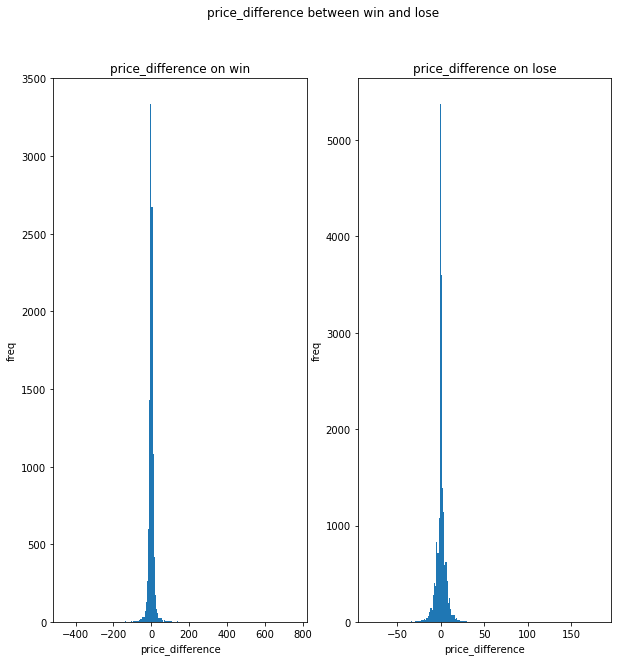

win price_difference mean => -0.232345166163142
lose price_difference mean => 0.28162536522021425
win price_difference standard deviation => 20.219818570639315
lose price_difference standard deviation => 5.849914984715031
win price_difference median => -0.5
lose price_difference median => 0.0
open time state


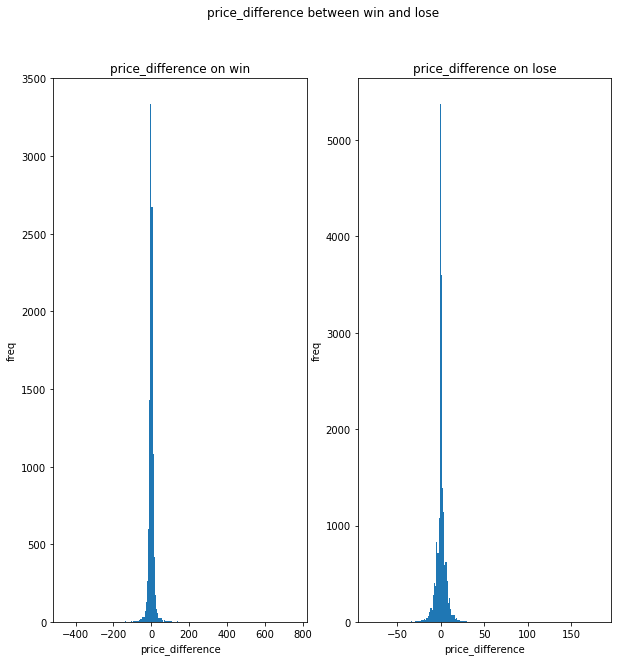

win price_difference mean => -0.232345166163142
lose price_difference mean => 0.28162536522021425
win price_difference standard deviation => 20.219818570639315
lose price_difference standard deviation => 5.849914984715031
win price_difference median => -0.5
lose price_difference median => 0.0
[Caution][FIXME] a width of bins is different
total max:763.0
win max  :763.0
total min:-456.5
win min  :-456.5
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:763.0
win max  :763.0
total min:-456.5
win min  :-456.5
if the larger different between total and win, the error is larger.


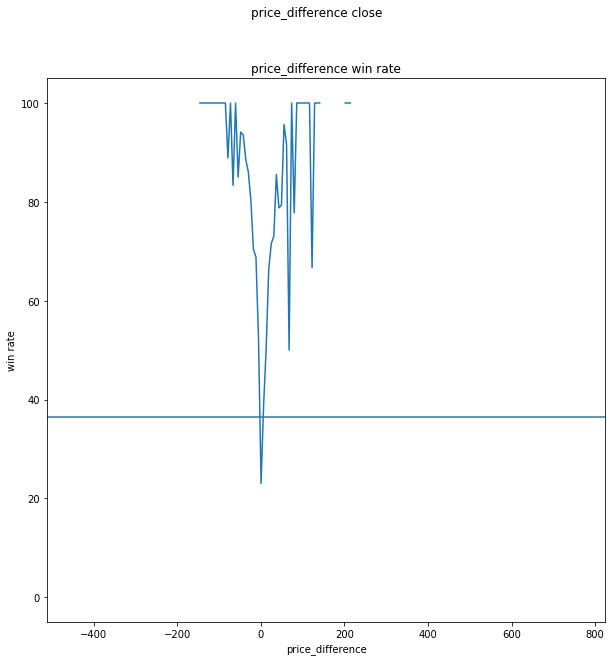

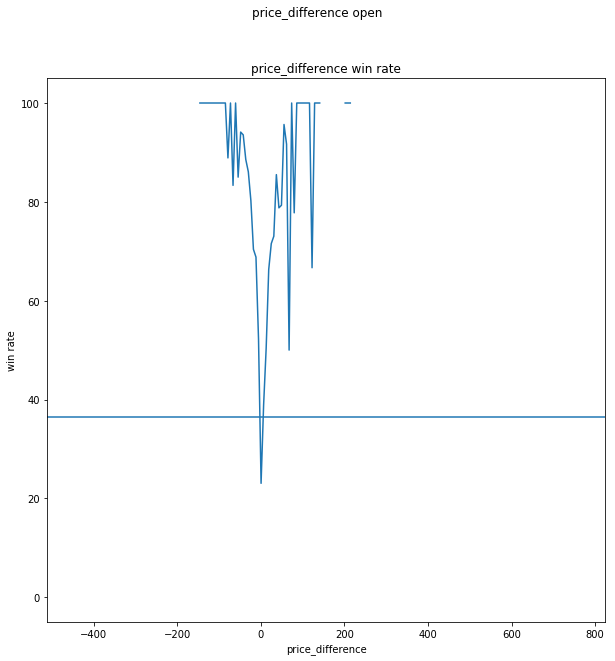

In [105]:
print("close time state")
create_hist(win_merged_close, lose_merged_close, "price_difference")
print("open time state")
create_hist(win_merged_open, lose_merged_open, "price_difference")

winning_rate_comparison(merged_transaction_log_close, summary_df, "price_difference", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "price_difference", "open")

### Price Difference Summary

#### closed
勝ちの値幅の変動がマイナスであること、負けの値幅の変動がマイナスである。
勝ちの値幅の標準偏差が負けに比べて非常に大きい。

勝っているときの値幅の変動がマイナスであることから、勝ちトレードにショートが多いと予想した。
結果は予想通りだったが、負けトレードにおけるショートの割合はさらに多かった。
ここにおいてはハイリスクハイリターンの関係が成立している。

#### open
結果は全く変化なし

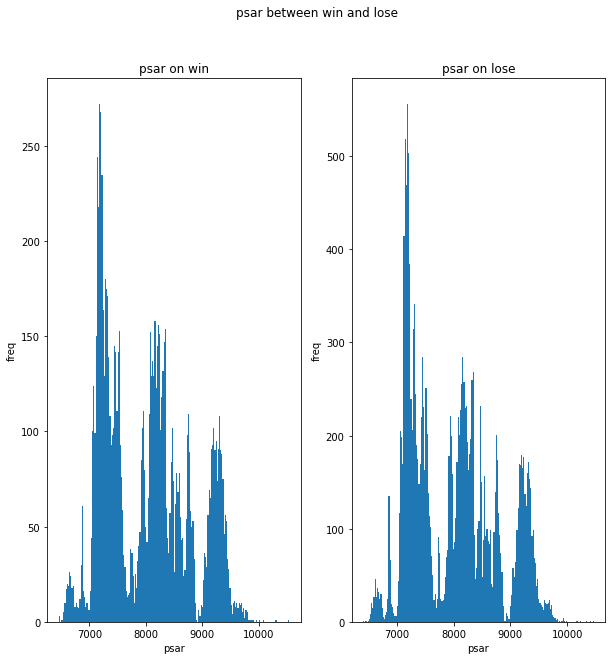

win psar mean => 8008.249246535385
lose psar mean => 7993.048285249045
win psar standard deviation => 767.3564204499505
lose psar standard deviation => 770.0791013618914
win psar median => 8036.3182197888
lose psar median => 7976.388742146846


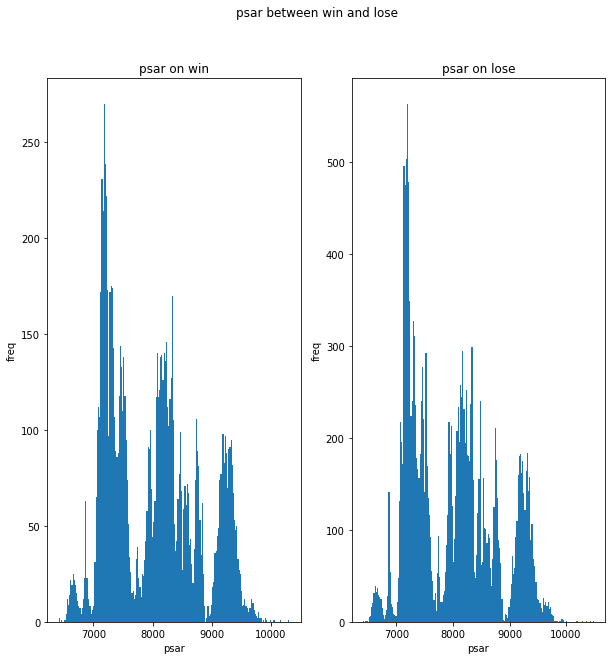

win psar mean => 8008.062675102691
lose psar mean => 7993.068098231844
win psar standard deviation => 767.003562688412
lose psar standard deviation => 770.1333492366224
win psar median => 8034.64643968
lose psar median => 7975.876339840001
[Caution][FIXME] a width of bins is different
total max:10543.169600000001
win max  :10543.169600000001
total min:6411.01
win min  :6456.8
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:10488.903503360001
win max  :10311.176939721185
total min:6410.0
win min  :6414.8519997615995
if the larger different between total and win, the error is larger.


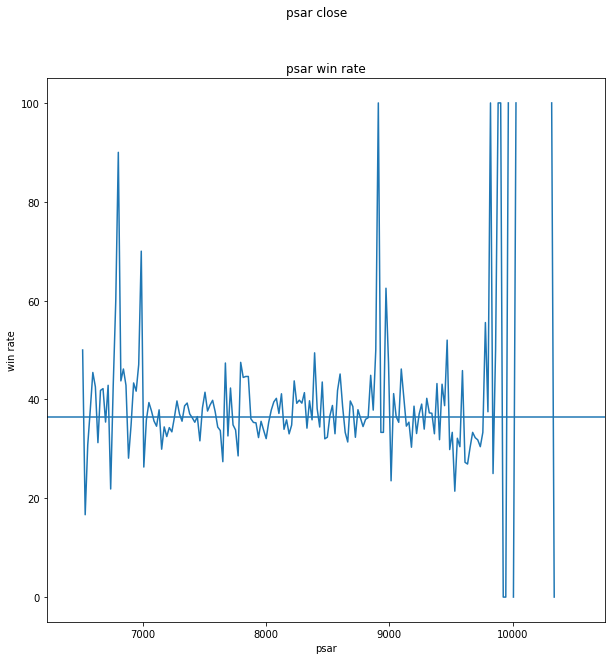

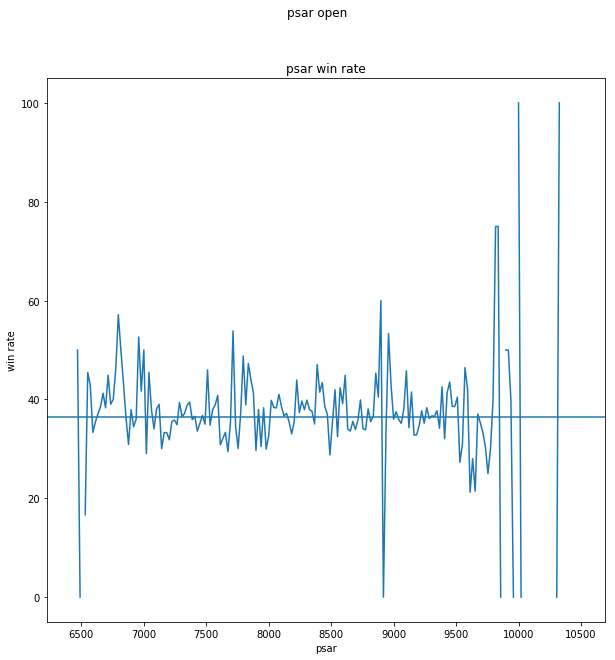

In [104]:
create_hist(win_merged_close, lose_merged_close, "psar")
create_hist(win_merged_open, lose_merged_open, "psar")
winning_rate_comparison(merged_transaction_log_close, summary_df, "psar", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "psar", "open")

### psar

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

グラフからは大きく3つの山が存在していることが確認できる。
左から順々に小さくなっていることがわかる。
この3つの山は3種類の状態が存在することを意味しているのかもしれない。

[MT5のページ](https://www.metatrader5.com/ja/terminal/help/indicators/trend_indicators/psar)によるとpsarにはトレンド相場がブルであるかベアであるかを検出することができるそうだ。
そこから考えると、トレンド相場のうちのブル相場、ベア相場、レンジ相場がこの3つの山に対応していそうである。
しかしそれ以外の可能性として、3ヶ月の値動きの、それぞれの月の平均的な位置がこの3つの山の中心にあることが挙げられる。
また、もしその3つの相転移が存在するならば、負けトレードにもブル、ベア、レンジの3つの山ができるのは、ブル、ベアのトレンド相場に強いbotの特性からすると妙である。

PSARはジャンプを特徴としている。この値がジャンプした際にはトレンドの転換、すなわち相転移の発生を検出する。

uptrend、すなわちbullかとdowntrend、すなわちbearかはpsar_trendの値を見るとわかる。
ここでの問題はuptrendとdowntrendが2つの値しか取らないことである。
つまり原理的にPSARの返り値にはレンジ相場が存在しない。

ただPSARの返り値はbottom trend followのbotに対して相性が良さそうだ。
より具体的には取引回数、頻度をそこまで下げることなく勝率を向上させることができそうだ。

#### open
全く変化なし

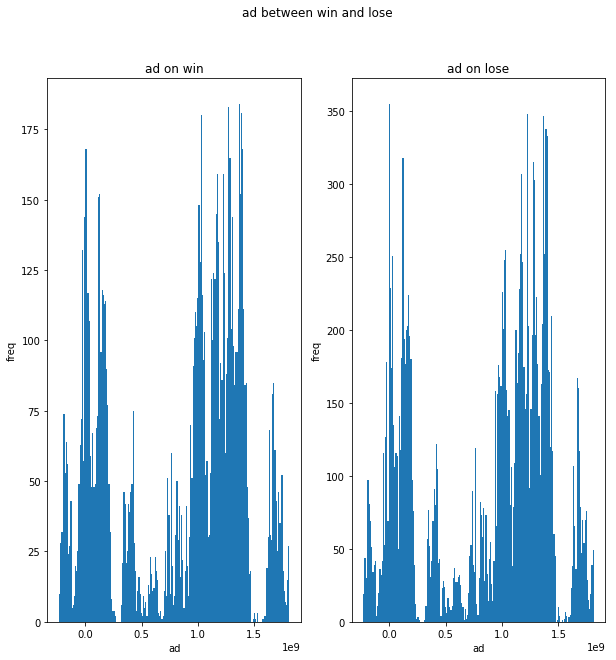

win ad mean => 827470856.7489346
lose ad mean => 848271830.6743057
win ad standard deviation => 576173482.4540168
lose ad standard deviation => 570635986.0403308
win ad median => 1025469650.1380575
lose ad median => 1034317220.5146744


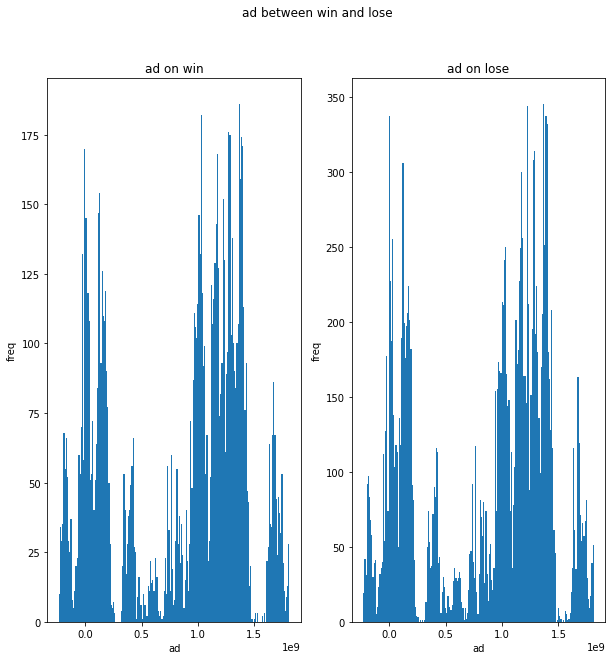

win ad mean => 827516820.900026
lose ad mean => 848192250.4818982
win ad standard deviation => 576175030.0665216
lose ad standard deviation => 570615576.8610651
win ad median => 1025438833.4134852
lose ad median => 1034805007.8667884
[Caution][FIXME] a width of bins is different
total max:1814123634.422566
win max  :1813891855.822566
total min:-236084131.3304052
win min  :-236084131.3304052
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:1813795808.422566
win max  :1813337293.422566
total min:-234999316.3304052
win min  :-234999316.3304052
if the larger different between total and win, the error is larger.


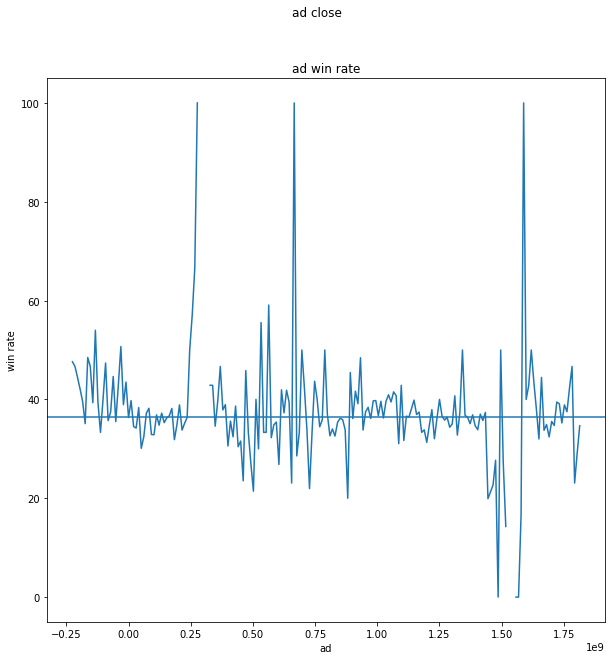

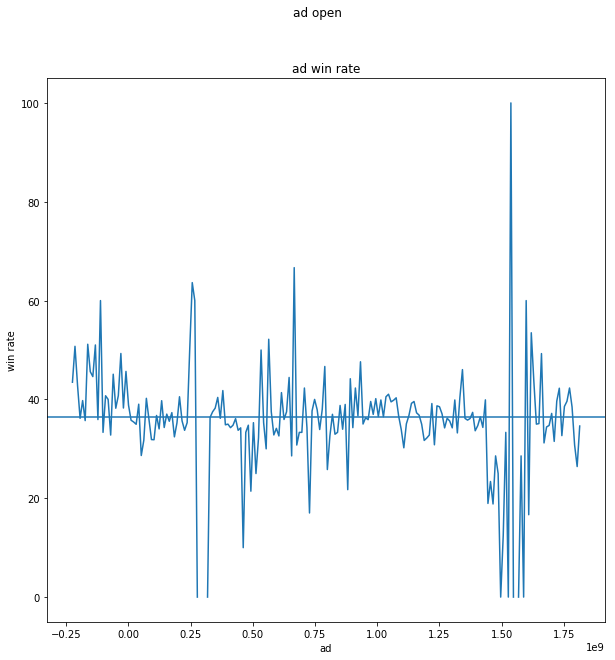

In [106]:
create_hist(win_merged_close, lose_merged_close, "ad")
create_hist(win_merged_open, lose_merged_open, "ad")
winning_rate_comparison(merged_transaction_log_close, summary_df, "ad", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "ad", "open")

### ad

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

[このページ](https://xn--hck6a9a3a3cl0j7al2328j687d.com/?p=4932)がADラインの説明としてわかりやすい。
この指標はダイバージェンスを検出する指標として使われる。もっぱら逆張りの用途で使われるようだが、逆に言えばこのダイバージェンスが起きていないときはトレンド相場が続くと判断することが可能になる。

またbitcoinの価格の変動が大きいということはつまり安定していないということであり、安定していないならば値が上がるか下がるかのみである。
このグラフにはうっすらと2つの山が見えているが、これは値が上がるか下がるか、つまりブル相場かベア相場かの2種類の状態を表していると
推測することができる。

#### open
変化なし

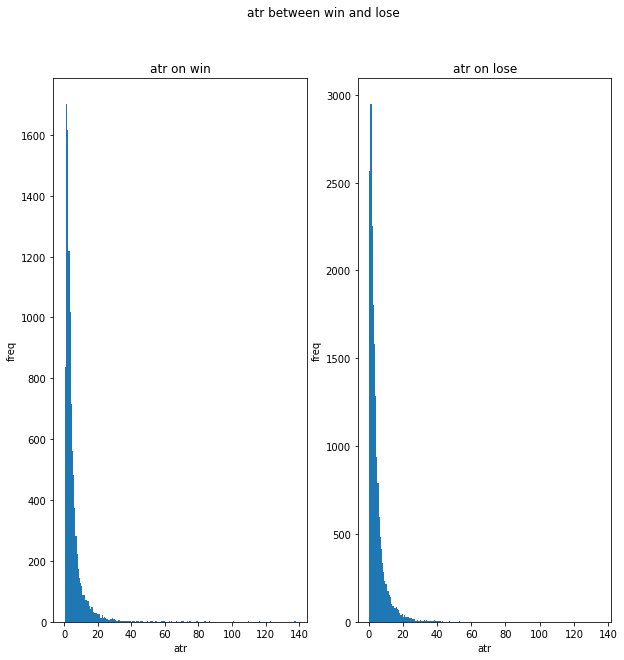

win atr mean => 5.0834711428759585
lose atr mean => 4.735458346089354
win atr standard deviation => 6.331986131542573
lose atr standard deviation => 5.6469947196718095
win atr median => 3.242887845989541
lose atr median => 3.0410056869926407


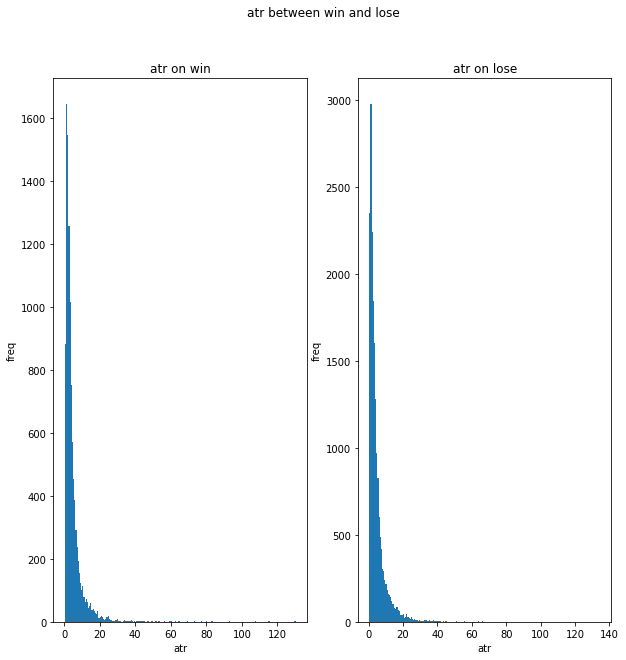

win atr mean => 4.745551734196593
lose atr mean => 4.816302397755373
win atr standard deviation => 5.835506366391509
lose atr standard deviation => 5.751875129362666
win atr median => 3.0764562046086645
lose atr median => 3.0912493887811827
[Caution][FIXME] a width of bins is different
total max:137.77784393094598
win max  :137.77784393094598
total min:0.4792999413839376
win min  :0.5430069264268153
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:134.44545242898138
win max  :130.18611913815013
total min:0.48077851699937063
win min  :0.5010906800246594
if the larger different between total and win, the error is larger.


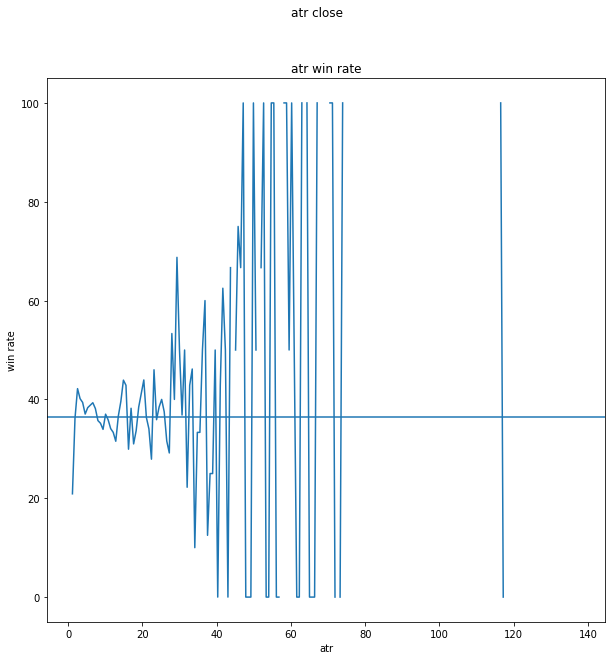

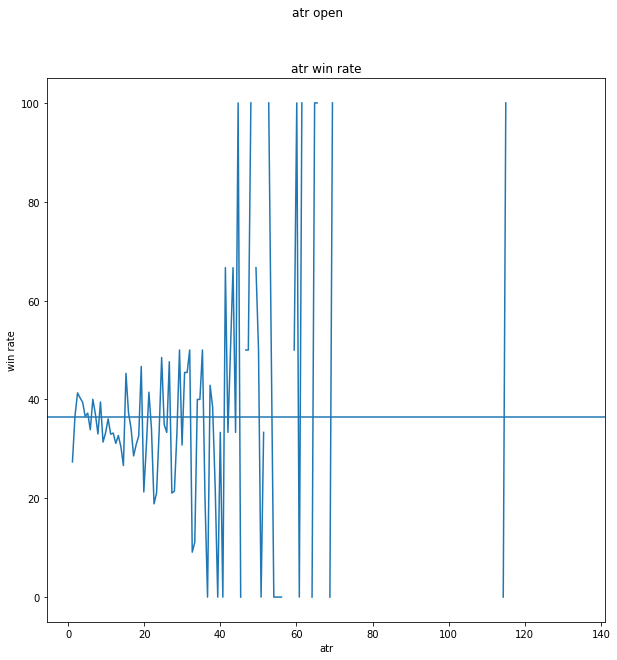

In [107]:
create_hist(win_merged_close, lose_merged_close, "atr")
create_hist(win_merged_open, lose_merged_open, "atr")
winning_rate_comparison(merged_transaction_log_close, summary_df, "atr", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "atr", "open")

### ATR

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

だがこの指標の特徴として高値-安値なので0以上の値のみしかとらないという点がある。
[ATRの説明はこちら](http://www.avatrade.co.jp/kojiro/13/)が詳しい。
ATRが増大している時はトレンド相場、ATRが縮小しているときはレンジ相場である。

それを鑑みると、勝ちトレードのATRが負けトレードのATRに比べて大きい傾向があることから、トレンドフォロー型botの特性を備えていると言える可能性がある。

#### close
変化なし

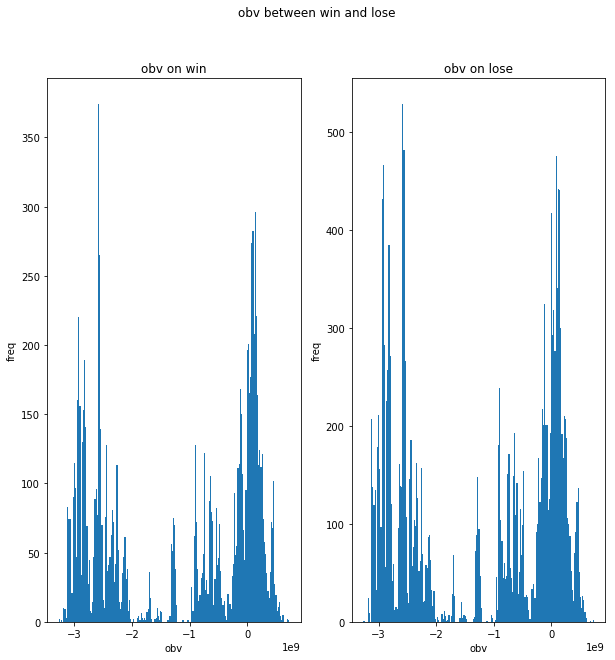

win obv mean => -1194493051.447602
lose obv mean => -1236499225.067471
win obv standard deviation => 1289387297.5092618
lose obv standard deviation => 1294357626.3589175
win obv median => -739106583.0
lose obv median => -775513821.5


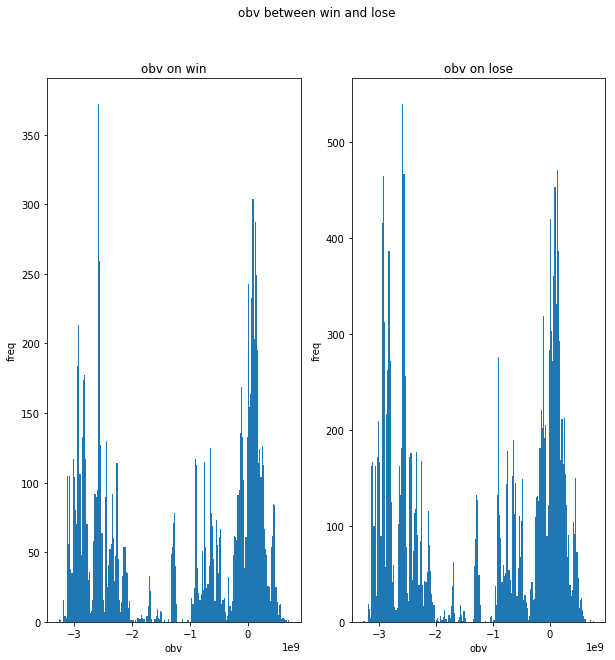

win obv mean => -1194159772.991975
lose obv mean => -1236580802.7197814
win obv standard deviation => 1289329199.9079483
lose obv standard deviation => 1294369120.9123495
win obv median => -738587870.0
lose obv median => -775745321.5
[Caution][FIXME] a width of bins is different
total max:734883933.0
win max  :728777633.0
total min:-3269833575.0
win min  :-3269833575.0
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:768131433.0
win max  :713449133.0
total min:-3273853135.0
win min  :-3263041035.0
if the larger different between total and win, the error is larger.


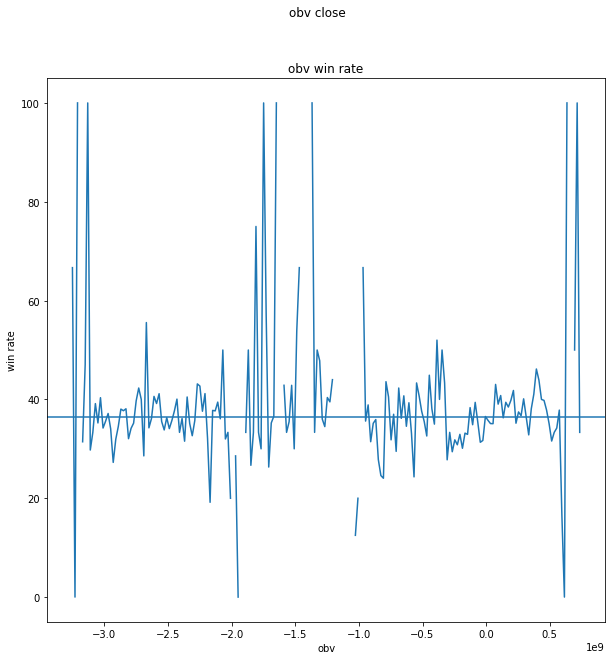

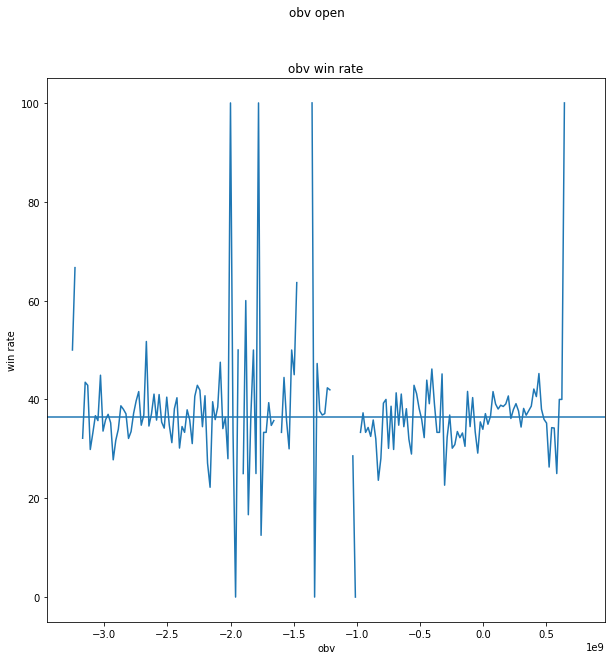

In [108]:
create_hist(win_merged_close, lose_merged_close, "obv")
create_hist(win_merged_open, lose_merged_open, "obv")
winning_rate_comparison(merged_transaction_log_close, summary_df, "obv", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "obv", "open")

### OBV
#### close
2つの群の間で明確な違いはなさそうである。
ノイズとみなして構わないだろう。

#### open
変化なし

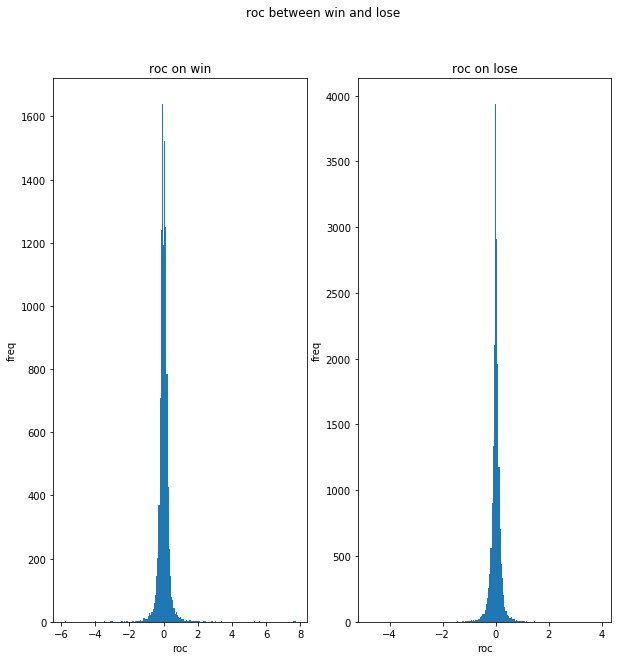

win roc mean => 0.00396302385739146
lose roc mean => 0.0025719487877329567
win roc standard deviation => 0.3204403974678678
lose roc standard deviation => 0.19625430022961832
win roc median => -0.006165229613219747
lose roc median => 0.006403007633126734
Kormogorov Smirnov test
KS     :0.13200850317006402
p-value:2.4295302827106147e-102
p <= 0.05, These distribution have a difference
F-test
F:        2.666
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        0.405
p-value:  0.685
p > 0.05, The averages are not different.
[Caution][FIXME] a width of bins is different
total max:7.71153846153847
win max  :7.71153846153847
total min:-5.762797449977908
win min  :-5.762797449977908
if the larger different between total and win, the error is larger.


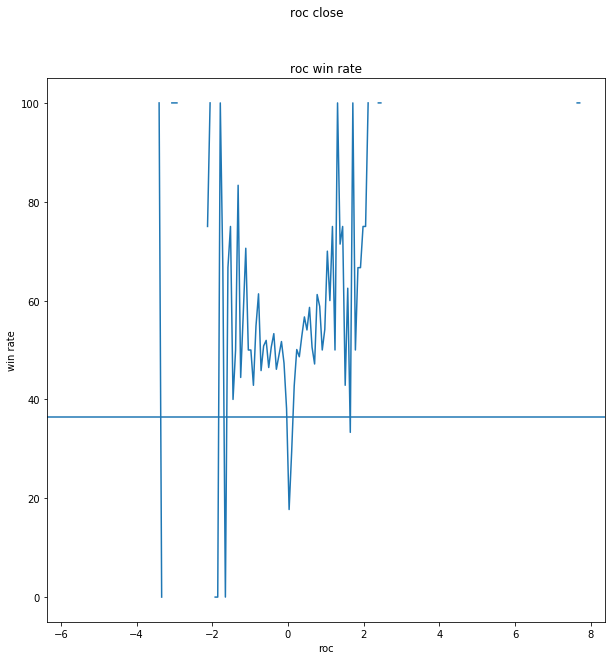

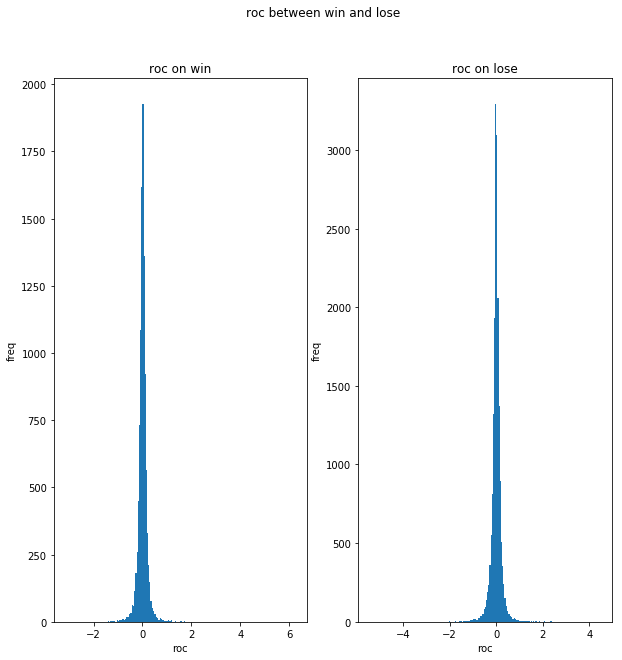

win roc mean => 0.009193520949414008
lose roc mean => -0.002018365621309009
win roc standard deviation => 0.22689148686624452
lose roc standard deviation => 0.238879442410473
win roc median => 0.006924488528115003
lose roc median => 0.0
Kormogorov Smirnov test
KS     :0.027495346578740282
p-value:7.58019544712128e-05
p <= 0.05, These distribution have a difference
F-test
F:        0.902
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        3.977
p-value:  0.0
p < 0.05, The averages are different.
[Caution][FIXME] a width of bins is different
total max:6.269891788669635
win max  :6.269891788669635
total min:-5.440490081680283
win min  :-3.1634919566534303
if the larger different between total and win, the error is larger.


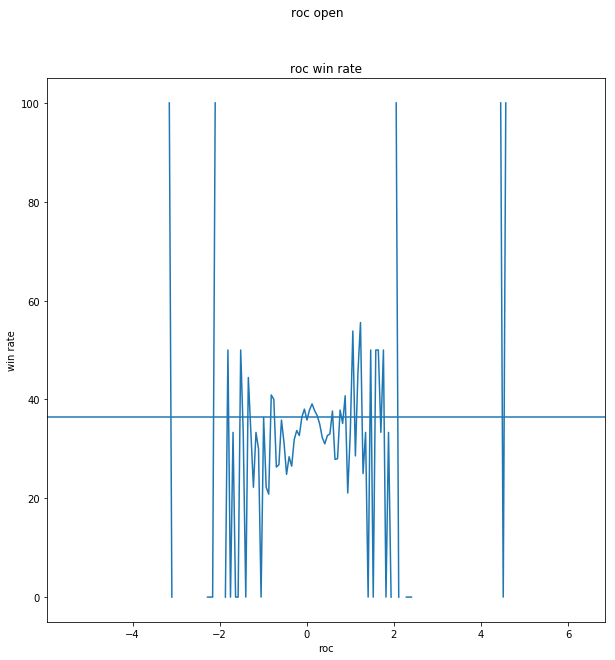

In [110]:
create_hist(win_merged_close, lose_merged_close, "roc")
rk.f_and_t_test(win_merged_close["roc"], lose_merged_close["roc"])
winning_rate_comparison(merged_transaction_log_close, summary_df, "roc", "close")

create_hist(win_merged_open, lose_merged_open, "roc")
rk.f_and_t_test(win_merged_open["roc"], lose_merged_open["roc"])

winning_rate_comparison(merged_transaction_log_open, summary_df, "roc", "open")

### ROC
#### close
ROCの大きさには明確な違いがある。
勝っているときの平均値は負けているときの平均値に比べるととても低い値になっている

#### open
テストの結果が変わったが依然として傾向に変化はなさそうである。

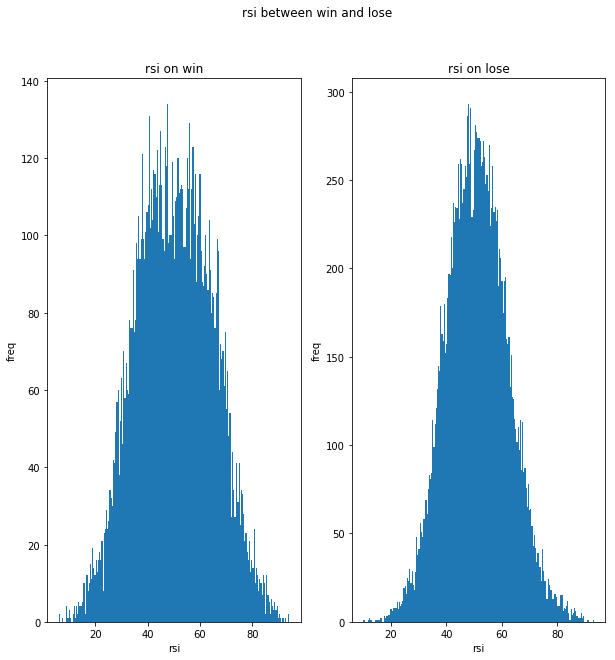

win rsi mean => 50.21880476218647
lose rsi mean => 51.0494025457515
win rsi standard deviation => 14.557370713841163
lose rsi standard deviation => 11.178544747427846
win rsi median => 50.02030987296489
lose rsi median => 50.82278046520474
Kormogorov Smirnov test
KS     :0.10304626841957115
p-value:1.5837485063707854e-62
p <= 0.05, These distribution have a difference
F-test
F:        1.696
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        -5.077
p-value:  0.0
p < 0.05, The averages are different.
[Caution][FIXME] a width of bins is different
total max:94.20951812827909
win max  :94.20951812827909
total min:5.9650211837450815
win min  :5.9650211837450815
if the larger different between total and win, the error is larger.


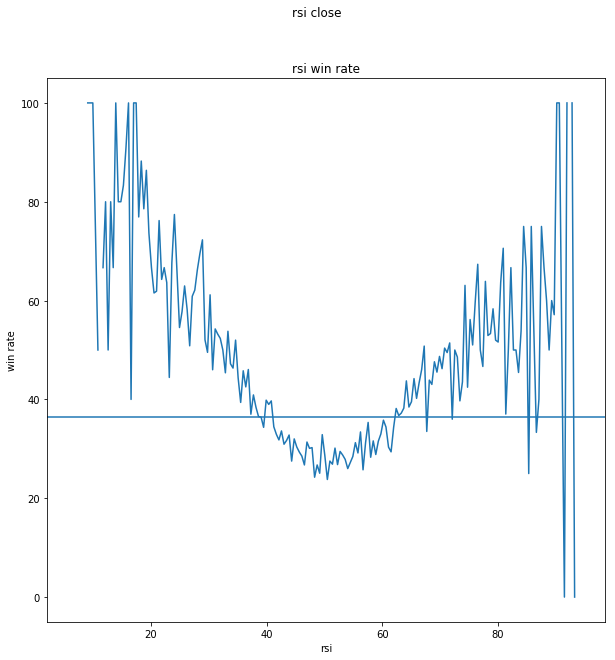

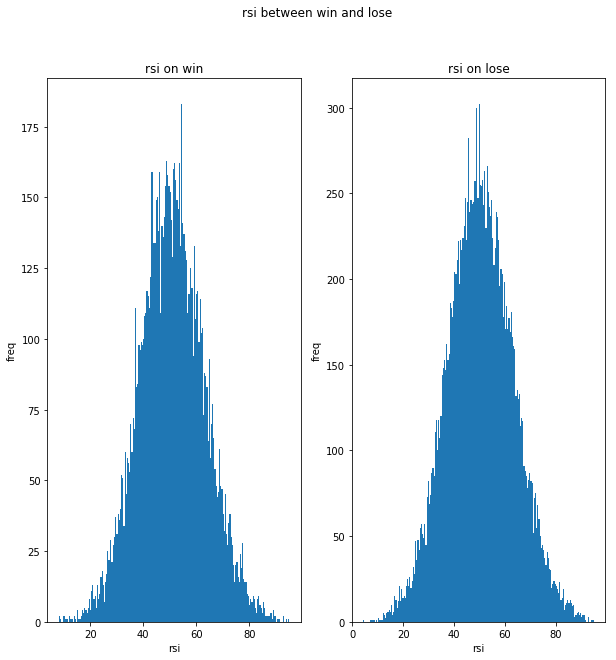

win rsi mean => 50.91847116164382
lose rsi mean => 50.45340941572801
win rsi standard deviation => 12.237248998214836
lose rsi standard deviation => 12.979396287987857
win rsi median => 50.70776955692811
lose rsi median => 50.15565417514834
Kormogorov Smirnov test
KS     :0.02992819665153093
p-value:1.1551630206319704e-05
p <= 0.05, These distribution have a difference
F-test
F:        0.889
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        3.05
p-value:  0.002
p < 0.05, The averages are different.
[Caution][FIXME] a width of bins is different
total max:95.18740841320535
win max  :95.18740841320535
total min:4.351352744900381
win min  :8.209354311791834
if the larger different between total and win, the error is larger.


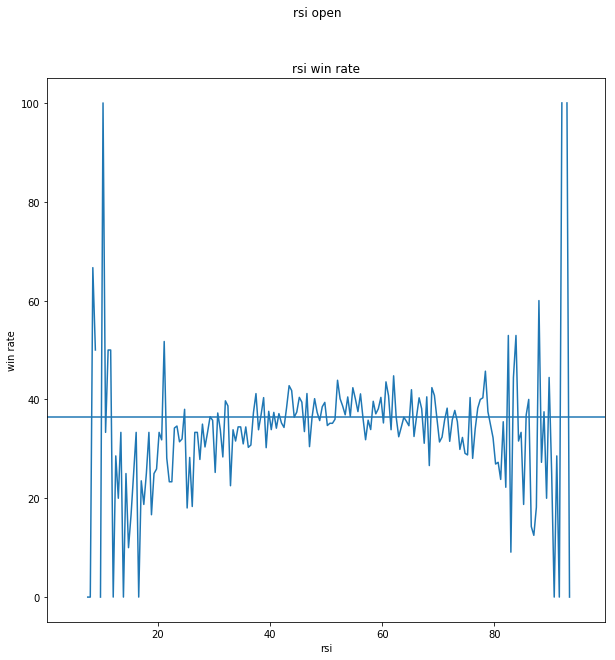

In [111]:
create_hist(win_merged_close, lose_merged_close, "rsi")
rk.f_and_t_test(win_merged_close["rsi"], lose_merged_close["rsi"])
winning_rate_comparison(merged_transaction_log_close, summary_df,"rsi", "close")

create_hist(win_merged_open, lose_merged_open, "rsi")
rk.f_and_t_test(win_merged_open["rsi"], lose_merged_open["rsi"])
winning_rate_comparison(merged_transaction_log_open, summary_df, "rsi", "open")

### RSI Summary
#### close
こちらにも明確な違いがあるが、もっとも大きな違いは裾野の大きさである。
勝っているときの方がRSIの標準偏差が大きい傾向にある。

#### open
t検定の結果が変わったがKS検定で同一の分布ではないことがわかっているのでこの結果に特段意味はなさそうである。

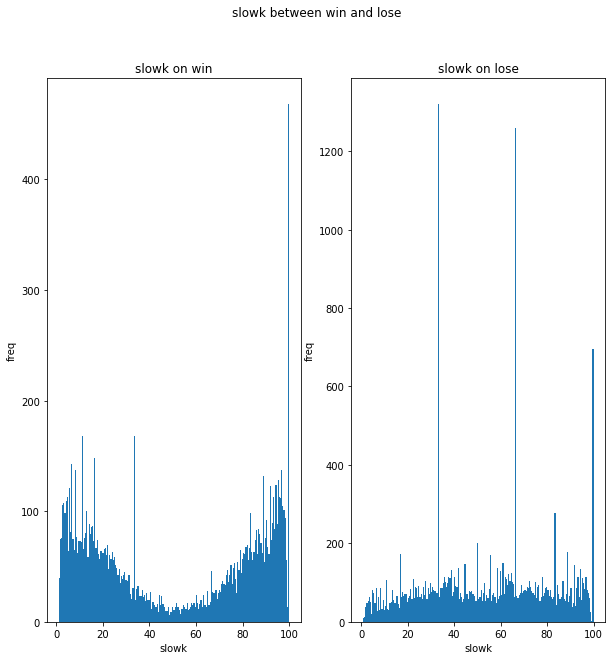

win slowk mean => 51.275876358281096
lose slowk mean => 54.15379826557771
win slowk standard deviation => 35.58620971487393
lose slowk standard deviation => 26.803405541420364
win slowk median => 47.99986400108449
lose slowk median => 55.55555555555148


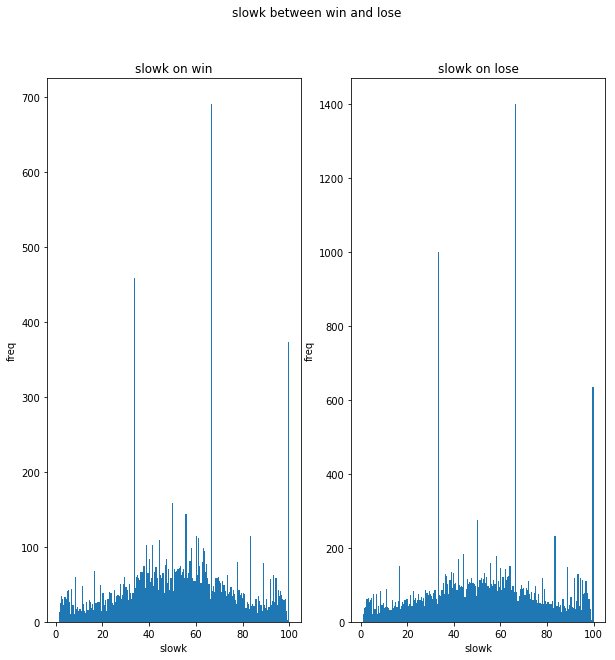

win slowk mean => 53.74760659277814
lose slowk mean => 53.764375733279486
win slowk standard deviation => 24.362348821245064
lose slowk standard deviation => 25.200836225111757
win slowk median => 54.665597433837696
lose slowk median => 54.20021470745884
[Caution][FIXME] a width of bins is different
total max:99.99999999999977
win max  :99.99999999999973
total min:0.7575757575748173
win min  :1.0101010100990633
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:99.99999999999996
win max  :99.99999999999983
total min:0.8771929824557998
win min  :1.1904761904752525
if the larger different between total and win, the error is larger.


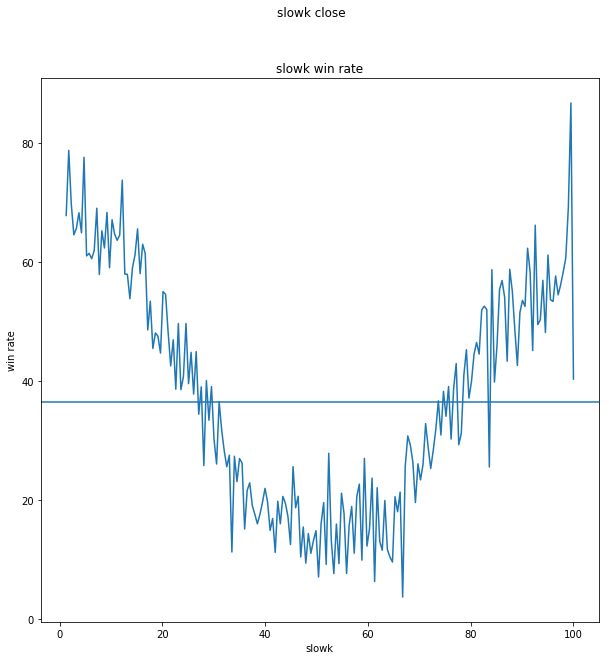

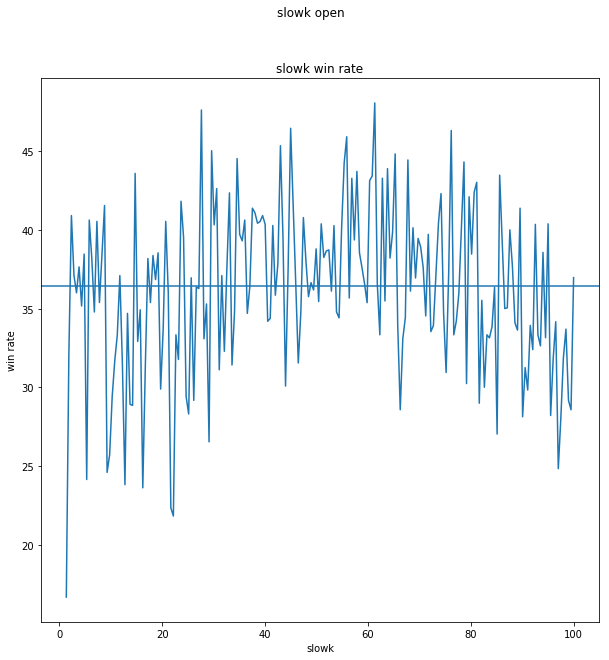

In [98]:
create_hist(win_merged_close, lose_merged_close, "slowk")
create_hist(win_merged_open, lose_merged_open, "slowk")
winning_rate_comparison(merged_transaction_log_close, summary_df,"slowk", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "slowk", "open")

### Slowk Summary

#### close
こちらには分布に明確な違いがある。
勝ちトレードのslowkはアンテナ状の分布をしており、負けトレードのslowkは平坦な値である。
ここから察すると、slowkの50からの差の絶対値が大きい場合に多く賭けることによって、botの収益性を向上させることができそうである。
また際立った0の扱いだが、これは勝っているときの標本数が750程度、負けているときの標本数が830程度と、その勝率から考えると、
0の場合でも上と同様に多めに賭けることで収益性は改善する。

掛率の調整の重要なしきい値としては、ある階級について勝ちトレードと負けトレードの数を合算しこれを分母、
勝ちトレードの数を分子として、ある階級についての勝ちの比率を計算する。
これを勝率で割ってやると、勝ちの比率が逆転するポイントを基準とした値が計算できる。
この指標の大きさに応じて掛率を変更することで収益性を改善することができる。

この指標は50より大きい場合と小さい場合についてそれぞれ計算する。
なぜならもしこれが対称的だとするならば、100の標本数と同程度0に標本数が集まる必要があるが、それが観測できないからである。

また、ところどころスパイクしている箇所については個別に切り分けて対応する必要があるだろう。

#### open
変化なし

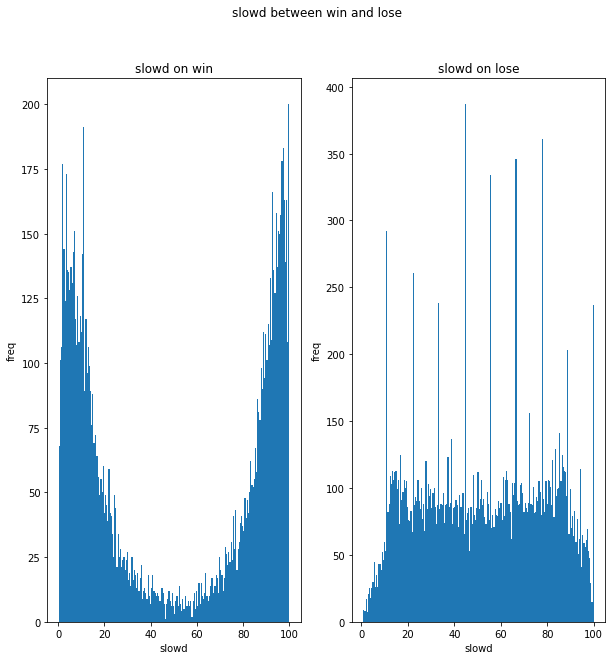

win slowd mean => 50.23967509946989
lose slowd mean => 52.61945364839078
win slowd standard deviation => 38.792380146574324
lose slowd standard deviation => 26.51336787583542
win slowd median => 44.76453784907897
lose slowd median => 53.333333333330344


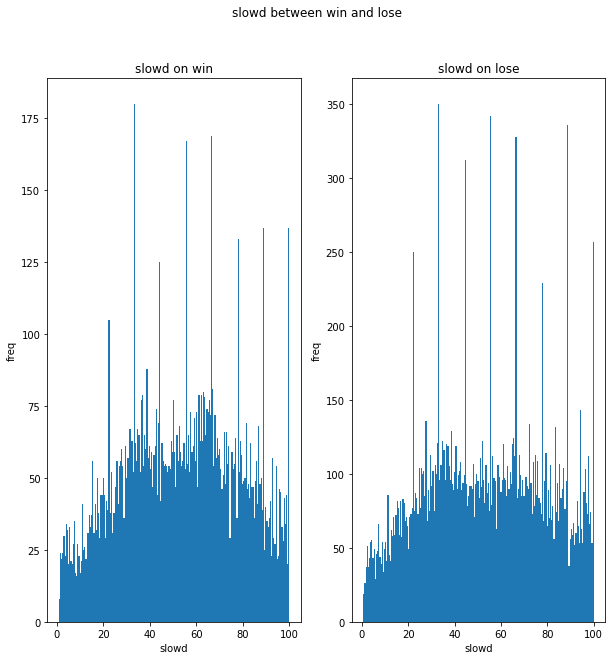

win slowd mean => 53.54368886801567
lose slowd mean => 53.39526330660677
win slowd standard deviation => 25.236111560502202
lose slowd standard deviation => 26.11904809070568
win slowd median => 54.67307483436029
lose slowd median => 53.63128942010076
[Caution][FIXME] a width of bins is different
total max:99.99999999999994
win max  :99.99999999999994
total min:0.3367003366992792
win min  :0.3367003366992792
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:99.99999999999973
win max  :99.99999999999967
total min:0.6734006733990832
win min  :0.8888888888876147
if the larger different between total and win, the error is larger.


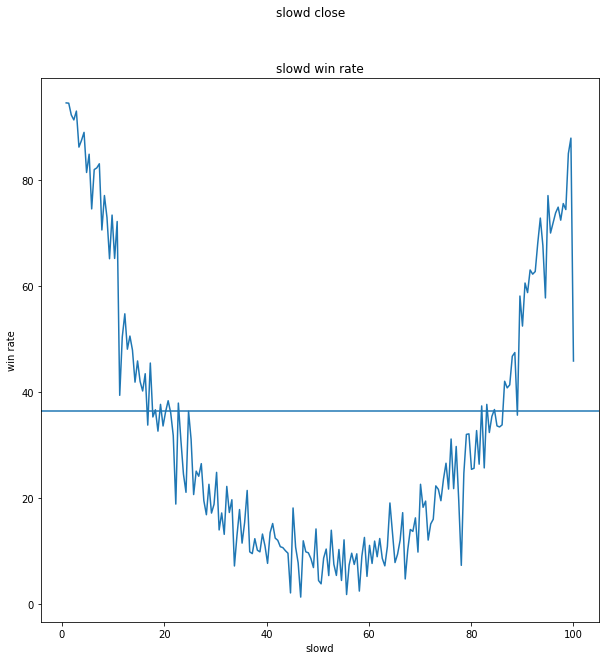

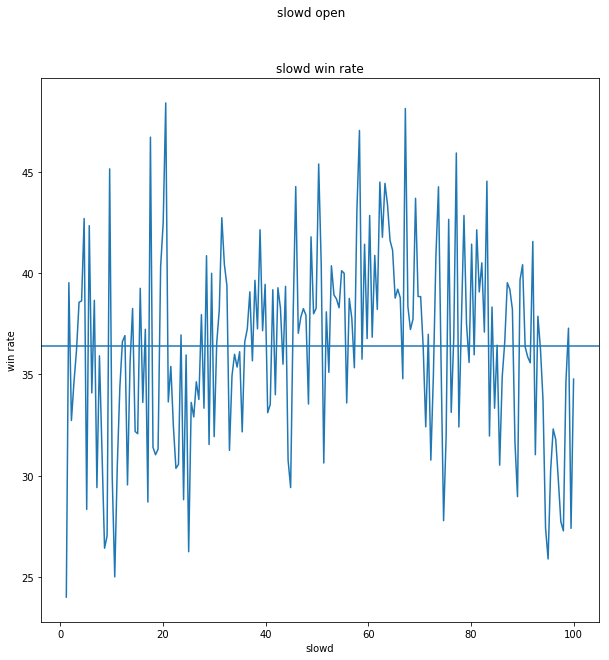

In [100]:
create_hist(win_merged_close, lose_merged_close, "slowd")
create_hist(win_merged_open, lose_merged_open, "slowd")

winning_rate_comparison(merged_transaction_log_close, summary_df, "slowd", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "slowd", "open")

### Slowd Summary
#### close
こちらにもslowkと同様の形状が観測される。
これをslowkと共に予測に用いる際は多重共線性に注意する必要がありそうである。

slowkと違ってこちらは0にも100と同程度と言えなくもない数の標本が存在している。
slowkよりも対称性の度合いとしてこちらの方が高そうである。
これを定量的に測る方法があればぜひ知りたいものである。
またこちらの方が、勝っているときのアンテナ状になっている部分の傾きが大きいようであるが、
これはslowkの100の値が多すぎるためにそう見えている可能性があるので、結論を得るためにはslowk=100を除去した形状を比較する必要がある。

負けトレードにはslowkよりも多くのスパイクが記録されている。
slowk, slowdのスパイクは50を中心に線対称していそうであり、指標の特性があるように見える。
またこの中でslowd=0の負けトレードの数が顕著に少ないことが見て取れる。
slowd=0のときには大きく賭けるようにすることでbotの収益性を改善することができる可能性がある。

#### open
変化なし

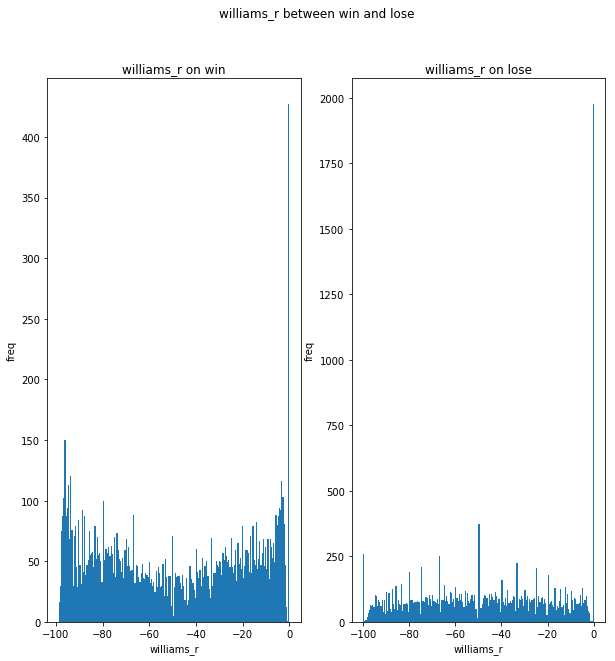

win williams_r mean => -48.7316534628658
lose williams_r mean => -44.982937508544566
win williams_r standard deviation => 32.10654085025959
lose williams_r standard deviation => 30.093520576414377
win williams_r median => -48.95321096450655
lose williams_r median => -45.06268379507816


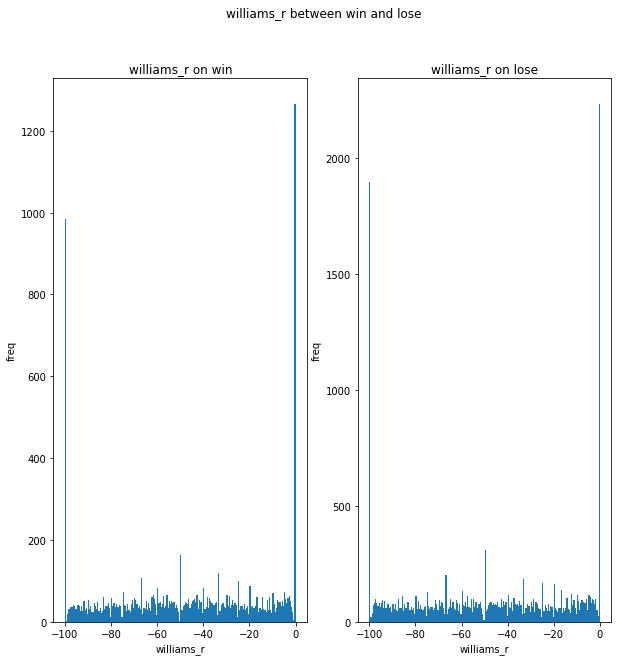

win williams_r mean => -47.38139012040028
lose williams_r mean => -48.449657593667034
win williams_r standard deviation => 33.462086800942
lose williams_r standard deviation => 34.386781617208875
win williams_r median => -46.259328358208954
lose williams_r median => -48.148148148148145
[Caution][FIXME] a width of bins is different
total max:-0.0
win max  :-0.0
total min:-100.0
win min  :-98.76543209876543
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:-0.0
win max  :-0.0
total min:-100.00000000000001
win min  :-100.00000000000001
if the larger different between total and win, the error is larger.


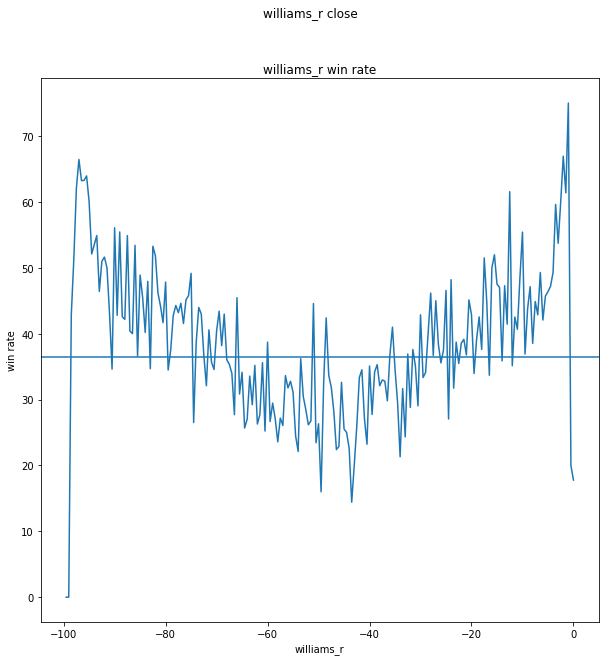

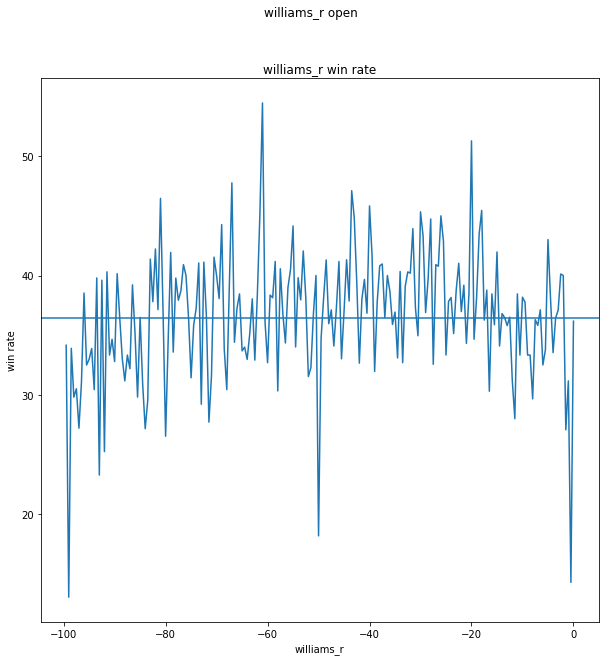

In [101]:
create_hist(win_merged_close, lose_merged_close, "williams_r")
create_hist(win_merged_open, lose_merged_open, "williams_r")
winning_rate_comparison(merged_transaction_log_close, summary_df, "williams_r", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "williams_r", "open")

### Wiiliams R Summary
#### close
こちらは値の50からの距離に応じて勝ちの比率が上昇している。
ただし0の場合の勝率はこのbotの全体の勝率とほとんど同じである。
また負けトレードの数は中心から線対称に、外側に向かうにつれて減少傾向にあるのに対し、
勝ちトレードの場合はその減少傾向が比較的薄いことがわかる。
全体での平均的な勝率を横線に引き、それぞれの階級の勝ちトレードの比率を確認するグラフを書いてみるのも一興だろう。

#### open
変化なし

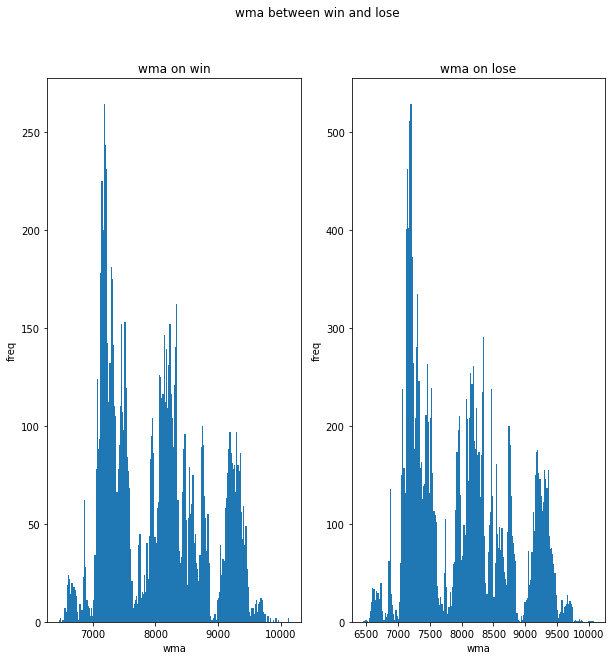

win wma mean => 8007.995188395389
lose wma mean => 7993.483067163283
win wma standard deviation => 766.5814765029451
lose wma standard deviation => 769.4079067695744
win wma median => 8033.418279569893
lose wma median => 7975.032258064516


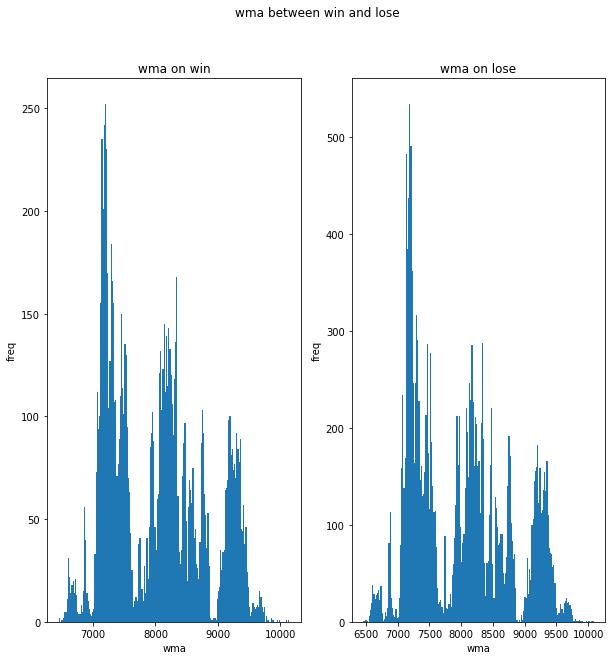

win wma mean => 8008.020831912074
lose wma mean => 7993.503236395034
win wma standard deviation => 766.5989776795751
lose wma standard deviation => 769.3878765924425
win wma median => 8034.122580645162
lose wma median => 7975.2881720430105
[Caution][FIXME] a width of bins is different
total max:10143.154838709677
win max  :10143.154838709677
total min:6452.656989247312
win min  :6452.656989247312
if the larger different between total and win, the error is larger.
[Caution][FIXME] a width of bins is different
total max:10143.154838709677
win max  :10143.154838709677
total min:6452.656989247312
win min  :6452.656989247312
if the larger different between total and win, the error is larger.


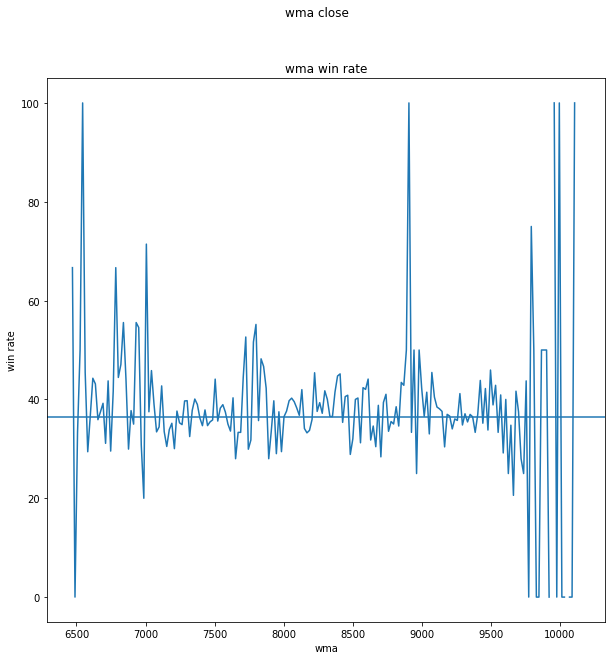

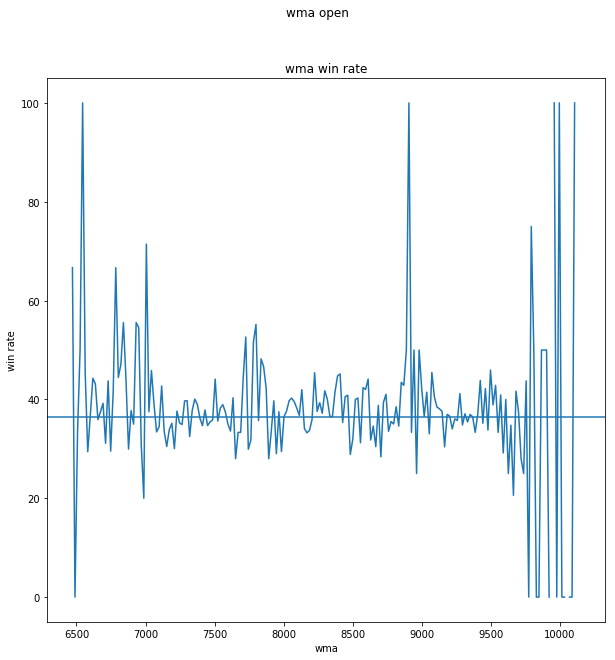

In [112]:
create_hist(win_merged_close, lose_merged_close, "wma")
create_hist(win_merged_open, lose_merged_open, "wma")
winning_rate_comparison(merged_transaction_log_open, summary_df, "wma", "close")
winning_rate_comparison(merged_transaction_log_open, summary_df, "wma", "open")

### WMA
#### close
3つの山が存在することが見て取れる。
この中の山の部分の勝率を見ると全体の平均値を上回っているようである。

#### open
変化なし